In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
url = "https://github.com/kaleko/CourseraML/raw/master/ex2/data/ex2data1.txt"
data = pd.read_csv(url, header=None, names=['Exam1', 'Exam2', 'Admitted'])
print(data.head())

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


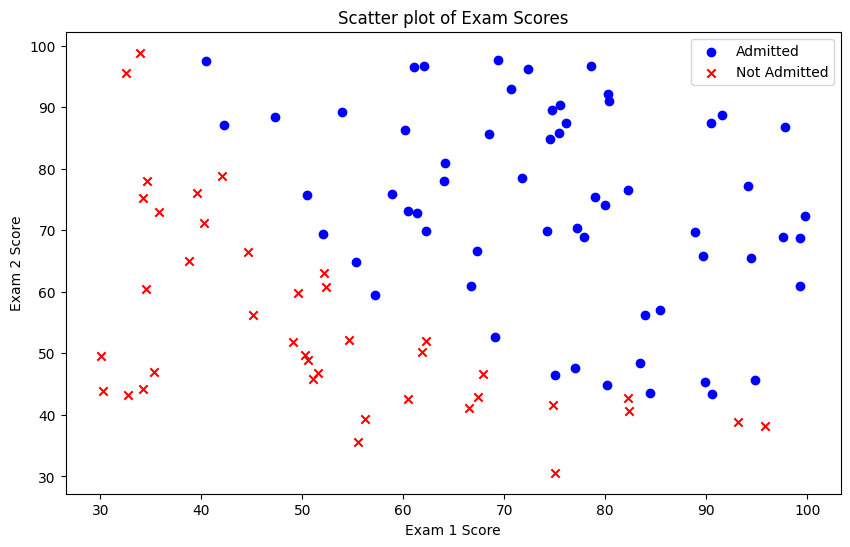

In [5]:
admitted = data[data['Admitted'] == 1]
not_admitted = data[data['Admitted'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(admitted['Exam1'], admitted['Exam2'], marker='o', color='blue', label='Admitted')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], marker='x', color='red', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Scatter plot of Exam Scores')
plt.legend()
plt.show()

In [6]:
X = data[['Exam1', 'Exam2']]
y = data['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[8 0]
 [4 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.67      0.80        12

    accuracy                           0.80        20
   macro avg       0.83      0.83      0.80        20
weighted avg       0.87      0.80      0.80        20



In [9]:
print('Model coefficients:')
print('Exam1 coefficient:', model.coef_[0][0])
print('Exam2 coefficient:', model.coef_[0][1])
print('Intercept:', model.intercept_)

Model coefficients:
Exam1 coefficient: 2.087616667204716
Exam2 coefficient: 2.0770684704017075
Intercept: [0.8831225]
